<a href="https://colab.research.google.com/github/halk1311/CL_Py_HW/blob/main/%D1%87%D0%B0%D1%81%D1%82%D0%BE%D1%82%D0%B0_%D0%B8_%D0%BE%D0%B1%D0%BB%D0%B0%D0%BA%D0%BE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 -qq install yargy --progress-bar off
!pip3 -qq install pymorphy2 --progress-bar off
!pip3 -qq install rusenttokenize --progress-bar off

import sys
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from rusenttokenize import ru_sent_tokenize
import string
import pymorphy2
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
import os
os.getcwd()

'/content'

In [ ]:
nltk.download("stopwords")
nltk.download('punkt')
from collections import defaultdict as dd 
from operator import itemgetter

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def show_wordcloud_by_freq_dict(freq_dict):
    
    wordcloud = WordCloud()
    wordcloud.generate_from_frequencies(frequencies=freq_dict)
    
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [ ]:
document = """Маленькие дети!
Ни за что на свете
Не ходите в Африку,
В Африку гулять!
В Африке акулы,
В Африке гориллы,
В Африке большие
Злые крокодилы
Будут вас кусать,
Бить и обижать,-
Не ходите, дети,
В Африку гулять.

В Африке разбойник,
В Африке злодей,
В Африке ужасный
Бар-ма-лей!

Он бегает по Африке
И кушает детей —
Гадкий, нехороший, жадный Бармалей!

И папочка, и мамочка
Под деревом сидят,
И папочка, и мамочка
Детям говорят:

«Африка ужасна,
Да-да-да!
Африка опасна,
Да-да-да!
Не ходите в Африку,
Дети, никогда!»

Но папочка и мамочка уснули вечерком,
А Танечка и Ванечка — в Африку бегом, —
В Африку!
В Африку!

Вдоль по Африке гуляют,
Фиги-финики срывают,-
Ну и Африка!
Вот так Африка!

Оседлали Носорога,
Покаталися немного,-
Ну и Африка!
Вот так Африка!

Со слонами на ходу
Поиграли в чехарду,-
Ну и Африка!
Вот так Африка!

Выходила к ним горилла,
Им горилла говорила,
Говорила им горилла,
Приговаривала:

«Вон акула Каракула
Распахнула злую пасть.
Вы к акуле Каракуле
Не хотите ли попасть
Прямо в па-асть?»

«Нам акула Каракула
Нипочём, нипочём,
Мы акулу Каракулу
Кирпичом, кирпичом,
Мы акулу Каракулу
Кулаком, кулаком!
Мы акулу Каракулу
Каблуком, каблуком!»

Испугалася акула
И со страху утонула,-
Поделом тебе, акула, поделом!

Но вот по болотам огромный
Идёт и ревёт бегемот,
Он идёт, он идёт по болотам
И громко и грозно ревёт.

А Таня и Ваня хохочут,
Бегемотово брюхо щекочут:
«Ну и брюхо,
Что за брюхо —
Замечательное!»

Не стерпел такой обиды
Бегемот,
Убежал за пирамиды
И ревёт,
Бармалея, Бармалея
Громким голосом
Зовёт:

«Бармалей, Бармалей, Бармалей!
Выходи, Бармалей, поскорей!
Этих гадких детей, Бармалей,
Не жалей, Бармалей, не жалей!»

Таня-Ваня задрожали —
Бармалея увидали.
Он по Африке идёт,
На всю Африку поёт:

«Я кровожадный,
Я беспощадный,
Я злой разбойник Бармалей!
И мне не надо
Ни мармелада,
Ни шоколада,
А только маленьких
(Да, очень маленьких!)
Детей!»

Он страшными глазами сверкает,
Он страшными зубами стучит,
Он страшный костёр зажигает,
Он страшное слово кричит:
«Карабас! Карабас!
Пообедаю сейчас!»

Дети плачут и рыдают,
Бармалея умоляют:

«Милый, милый Бармалей,
Смилуйся над нами,
Отпусти нас поскорей
К нашей милой маме!

Мы от мамы убегать
Никогда не будем
И по Африке гулять
Навсегда забудем!
Милый, милый людоед,
Смилуйся над нами,
Мы дадим тебе конфет,
Чаю с сухарями!»

Но ответил людоед:
«Не-е-ет!!!»

И сказала Таня Ване:
«Посмотри, в аэроплане
Кто-то по небу летит.
Это доктор, это доктор,
Добрый доктор Айболит!»

Добрый доктор Айболит
К Тане-Ване подбегает,
Таню-Ваню обнимает
И злодею Бармалею,
Улыбаясь, говорит:

«Ну, пожалуйста, мой милый,
Мой любезный Бармалей,
Развяжите, отпустите
Этих маленьких детей!»

Но злодей Айболита хватает
И в костёр Айболита бросает.
И горит, и кричит Айболит:
«Ай, болит! Ай, болит! Ай, болит!»

А бедные дети под пальмой лежат,
На Бармалея глядят
И плачут, и плачут, и плачут!

Но вот из-за Нила
Горилла идёт,
Горилла идёт,
Крокодила ведёт!

Добрый доктор Айболит
Крокодилу говорит:
«Ну, пожалуйста, скорее
Проглотите Бармалея,
Чтобы жадный Бармалей
Не хватал бы,
Не глотал бы
Этих маленьких детей!»

Повернулся,
Улыбнулся,
Засмеялся
Крокодил,
И злодея
Бармалея,
Словно муху,
Проглотил!

Рада, рада, рада, рада детвора,
Заплясала, заиграла у костра:
«Ты нас,
Ты нас
От смерти спас,
Ты нас освободил.
Ты в добрый час
Увидел нас,
о добрый
Крокодил!»

Но в животе у Крокодила
Темно и тесно и уныло,
И в животе у Крокодила
Рыдает, плачет Бармалей:
«О, я буду добрей!
Полюблю я детей!
Не губите меня!
Пощадите меня!
О, я буду, я буду, я буду добрей!»

Пожалели дети Бармалея,
Крокодилу дети говорят:
«Если он и вправду сделался добрее,
Отпусти его, пожалуйста, назад!
Мы возьмём с собою Бармалея,
Увезём в далёкий Ленинград!»

Крокодил головою кивает,
Широкую пасть разевает, —
И оттуда, улыбаясь, вылетает Бармалей,
А лицо у Бармалея и добрее и милей:
«Как я рад, как я рад,
Что поеду в Ленинград!»

Пляшет, пляшет Бармалей, Бармалей:
«Буду, буду я добрей, да, добрей!
Напеку я для детей, для детей
Пирогов и кренделей, кренделей!
По базарам, по базарам буду, буду я гулять!
Буду даром, буду даром пироги я раздавать,
Кренделями, калачами ребятишек угощать.

А для Ванечки
И для Танечки
Будут, будут у меня
Мятны прянички!
Пряник мятный,
Ароматный,
Удивительно приятный,
Приходите, получите,
Ни копейки не платите,
Потому что Бармалей
Любит маленьких детей,
Любит, любит, любит, любит,
Любит маленьких детей!»"""

In [ ]:
morph_analyzer = pymorphy2.MorphAnalyzer()
russian_stopwords = stopwords.words('russian')

def preprocess_tokenize(text):
    
    text_preprocessed_tokenized = []
    additional_stoplist = ["", "»", "«", "—"]
        
    for sentence in ru_sent_tokenize(text):
        clean_words = [word.strip(string.punctuation) for word in word_tokenize(text)]
        clean_words = [word.lower() for word in clean_words if word not in russian_stopwords]
        clean_lemmas = [morph_analyzer.parse(word)[0].normal_form for word in clean_words]
        clean_lemmas = [item for item in clean_lemmas if item not in additional_stoplist]
        text_preprocessed_tokenized.extend(clean_lemmas)
    return text_preprocessed_tokenized

бармалей	0.048042704626333865
африка	0.04626334519572891
ребёнок	0.032028469750889264
и	0.03024911032028431
быть	0.02491103202846944
в	0.01779359430604962
не	0.016014234875444663
акула	0.016014234875444663
крокодил	0.016014234875444663
мы	0.016014234875444663


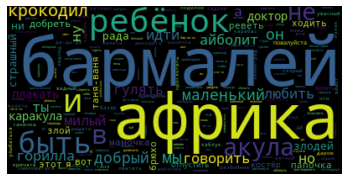

None
Маленькие дети!
Ни за что на свете
Не ходите в Африку,
В Африку гулять!
В Африке акулы,
В Африке гориллы,
В Африке большие
Злые крокодилы
Будут вас кусать,
Бить и обижать,-
Не ходите, дети,
В Африку гулять.

В Африке разбойник,
В Африке злодей,
В Африке ужасный
Бар-ма-лей!

Он бегает по Африке
И кушает детей —
Гадкий, нехороший, жадный Бармалей!

И папочка, и мамочка
Под деревом сидят,
И папочка, и мамочка
Детям говорят:

«Африка ужасна,
Да-да-да!
Африка опасна,
Да-да-да!
Не ходите в Африку,
Дети, никогда!»

Но папочка и мамочка уснули вечерком,
А Танечка и Ванечка — в Африку бегом, —
В Африку!
В Африку!

Вдоль по Африке гуляют,
Фиги-финики срывают,-
Ну и Африка!
Вот так Африка!

Оседлали Носорога,
Покаталися немного,-
Ну и Африка!
Вот так Африка!

Со слонами на ходу
Поиграли в чехарду,-
Ну и Африка!
Вот так Африка!

Выходила к ним горилла,
Им горилла говорила,
Говорила им горилла,
Приговаривала:

«Вон акула Каракула
Распахнула злую пасть.
Вы к акуле Каракуле
Не хотите ли попасть


In [ ]:
    text_words_frequencies = dd(int)
    document_tokenized = preprocess_tokenize(document)
    for word in document_tokenized:
        text_words_frequencies[word] += 1 / len(document_tokenized)

    sorted_frequency_table = sorted(text_words_frequencies.items(), 
                                    key=itemgetter(1), reverse=True)    

    for word, freq in sorted_frequency_table[:10]:
        print('\t'.join((word, str(freq))))

    print(show_wordcloud_by_freq_dict(text_words_frequencies))
    print(document)